# Data Wrangling & EDA

------

## Contents<a id='Contents'></a>
* [Introduction & Feature Descriptions](#introduction--feature-descriptions)  
* [Imports & Reading Data](#imports--reading-data)  
* [Exploratory Data Analysis](#exploratory-data-analysis)  
    * [Investigation of Zero-Values](#investigation-of-zero-values)
    
---

## Introduction & Feature Descriptions

In this Jupyter notebook, I will explore a dataset containing information about the composition of concrete mixes and their resulting compressive strength. The dataset includes features such as the amount of cement (in kilograms per cubic meter) and coarse aggregate (in kilograms per cubic meter) used in the mix, among others. The target feature of interest is the compressive strength of the concrete in megapascals (MPa).  

My goal is to perform an exploratory data analysis of the dataset to gain insights into the relationships between the features and the target variable. I will also perform data cleaning and missing data analysis to ensure that the data is suitable for further analysis. By the end of this notebook, I hope to have a better understanding of the dataset and be able to make informed decisions about how to proceed with preprocessing and modeling.  

**Features & Units:**  
 * *cement:* kg in a m^3 mixture  
 * *slag:* kg in a m^3 mixture  
 * *flyash:* kg in a m^3 mixture  
 * *water:* kg in a m^3 mixture  
 * *superplasticizer:* kg in a m^3 mixture  
 * *coarseaggregate:* kg in a m^3 mixture  
 * *fineaggregate:* kg in a m^3 mixture  
 * *age:* in days  
 * *csMPa:* compressive strength in MPa (megapascals)  
 ---

## Imports & Reading Data

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns',None)
plt.style.use('ggplot')

import sys
sys.path.append('../../../../DS_Mentorship_Projects/')
from utils import missing_data

In [2]:
# Read csv into a pandas dataframe
data = pd.read_csv('../data/Concrete_Data_Yeh.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


There are 8 predictor variables and one target variable (csMPA).

In [3]:
data.shape

(1030, 9)

There are 1030 samples with 9 features.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


No missing data in the dataset.  The datatypes look correct as well.

---

## Exploratory Data Analysis

In [5]:
# Generate descriptive statistics of each feature
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


It seems that the maximum values for many of the columns lie more than two standard deviations from the mean suggesting they may be outliers.

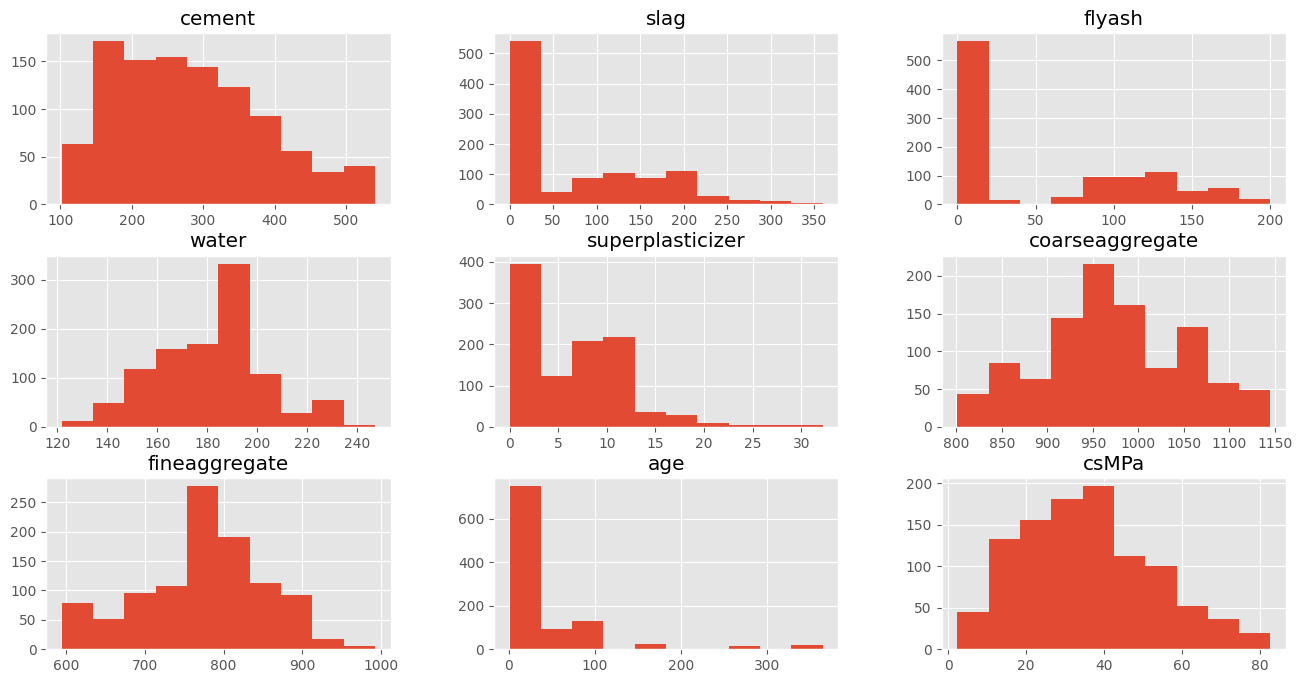

In [6]:
# Plot histograms for all features
hist = data.hist(layout=(3,3), figsize=(16,8))

Most of the features are left skewed.  
There is very little data for samples with age > ~100.

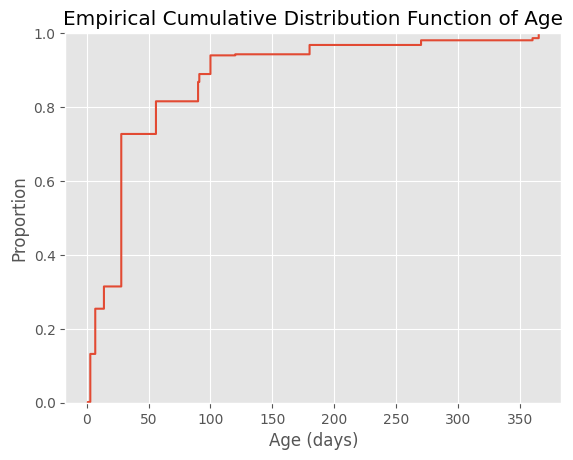

In [7]:
# Plot Empirical Cumulative Distribution Function to show how age is distributed
sns.ecdfplot(data=data, x='age', stat='proportion')
plt.title('Empirical Cumulative Distribution Function of Age')
plt.xlabel('Age (days)')

plt.show()

More than 70% of the samples have age < 50 days and ~90% of the samples have age < 100 days.

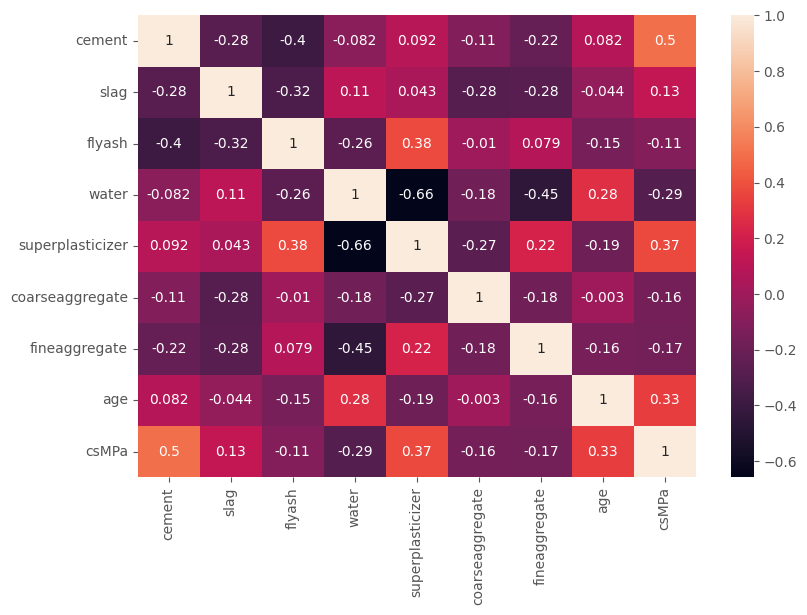

In [8]:
# Heatmap of correlations between each feature
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

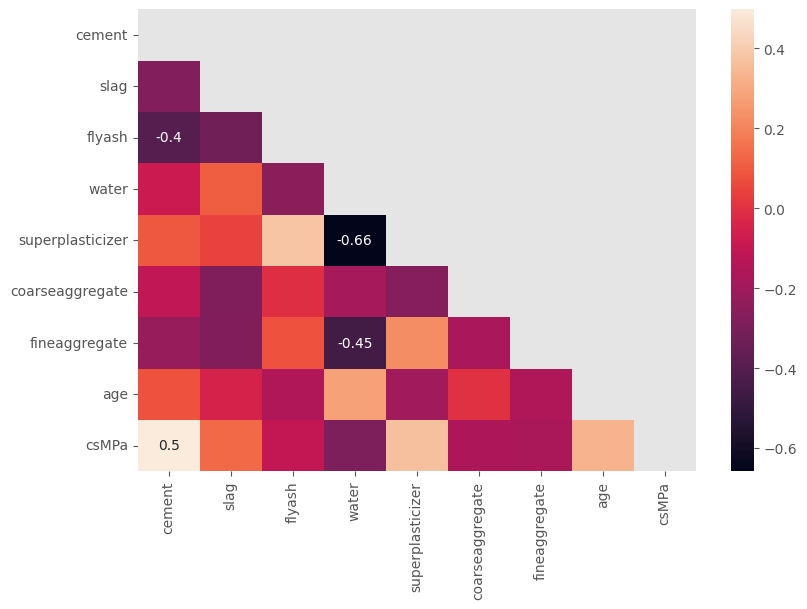

In [9]:
# Cleaner Heatmap only showing values above 0.4 and below -0.4
plt.figure(figsize=(9,6))

mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), annot=True, mask = mask)

for t in heatmap.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text
plt.show()

There is no clear correlation between any feature and the target feature.  The largest absolute correlation is between the amount of superplacticizer and water used.  The largest correlations with compression strength are cement, superplasticizer, and age.

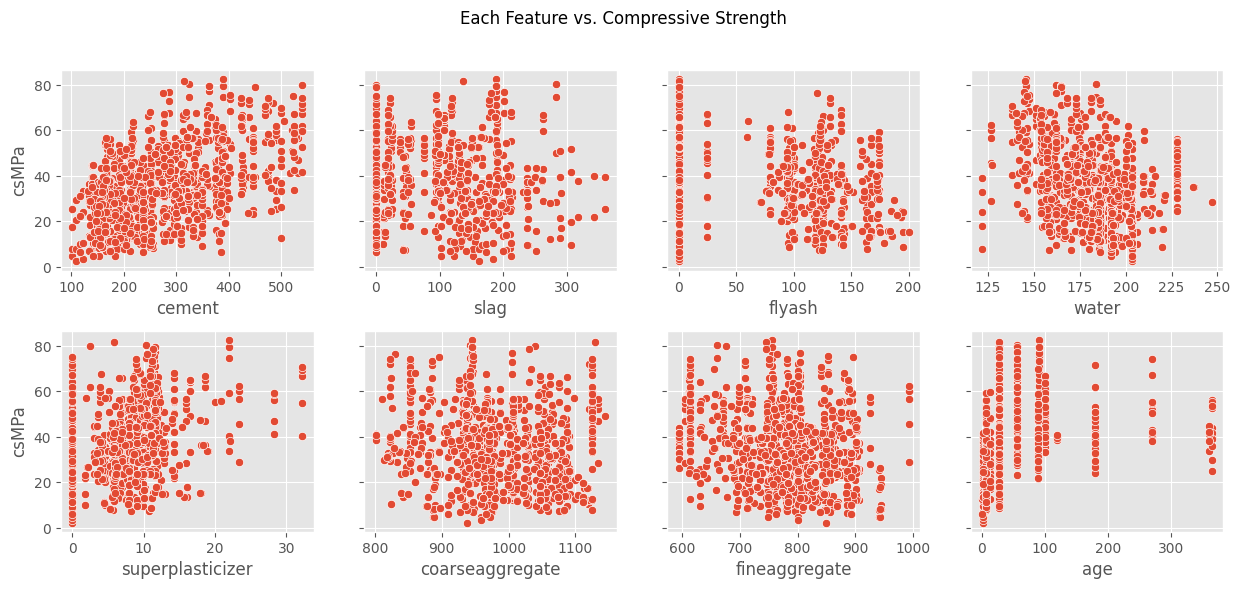

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6), sharey=True)
fig.suptitle('Each Feature vs. Compressive Strength')
plt.subplots_adjust(hspace=0.3)

for i, ax in enumerate(axes.reshape(-1)):
    sns.scatterplot(ax = ax, data = data, x = data.columns[i], y = 'csMPa')
    
plt.show()

I will replot the features with the highest correlation to strength to observe more clearly.

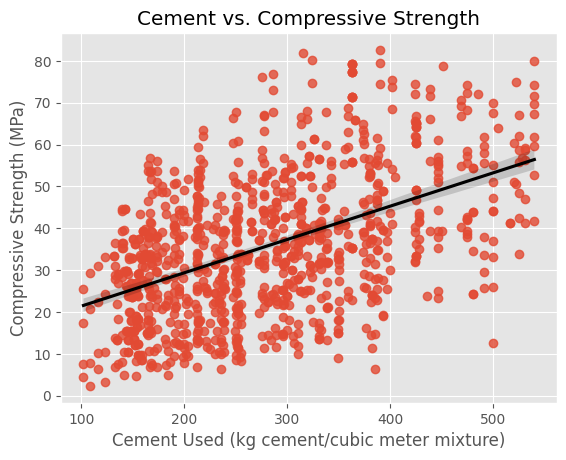

In [11]:
# Plot cement vs. concrete strength
sns.regplot(data = data, x = 'cement', y = 'csMPa', line_kws={"color": "black"})
plt.title('Cement vs. Compressive Strength')
plt.xlabel('Cement Used (kg cement/cubic meter mixture)')
plt.ylabel('Compressive Strength (MPa)')
plt.show()

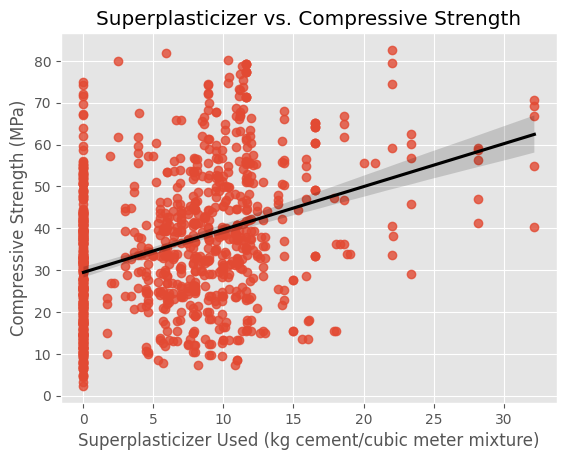

In [12]:
# Plot superplasticizer vs. concrete strength
sns.regplot(data = data, x = 'superplasticizer', y = 'csMPa', line_kws={"color": "black"})
plt.title('Superplasticizer vs. Compressive Strength')
plt.xlabel('Superplasticizer Used (kg cement/cubic meter mixture)')
plt.ylabel('Compressive Strength (MPa)')
plt.show()

Note that many of the samples used no superplasticizer.

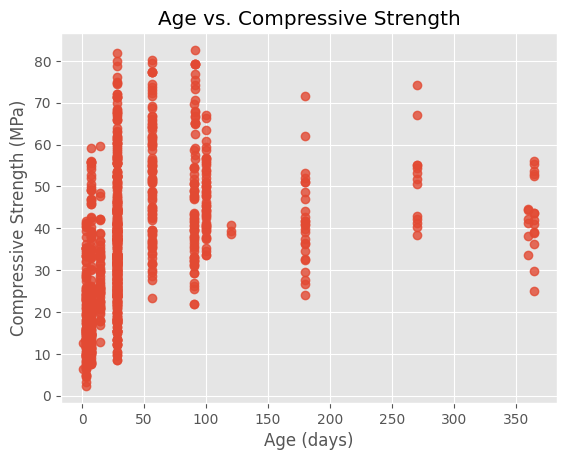

In [13]:
# Plot age vs. concrete strength
sns.regplot(data = data, x = 'age', y = 'csMPa', fit_reg=False)
plt.title('Age vs. Compressive Strength')
plt.xlabel('Age (days)')
plt.ylabel('Compressive Strength (MPa)')
plt.show()

It seems there may be a dropoff in compressive strength after 100 days. However, there are relatively few data points in this range.

It is clear that there is no single feature that can be used alone to predict compressive strength.

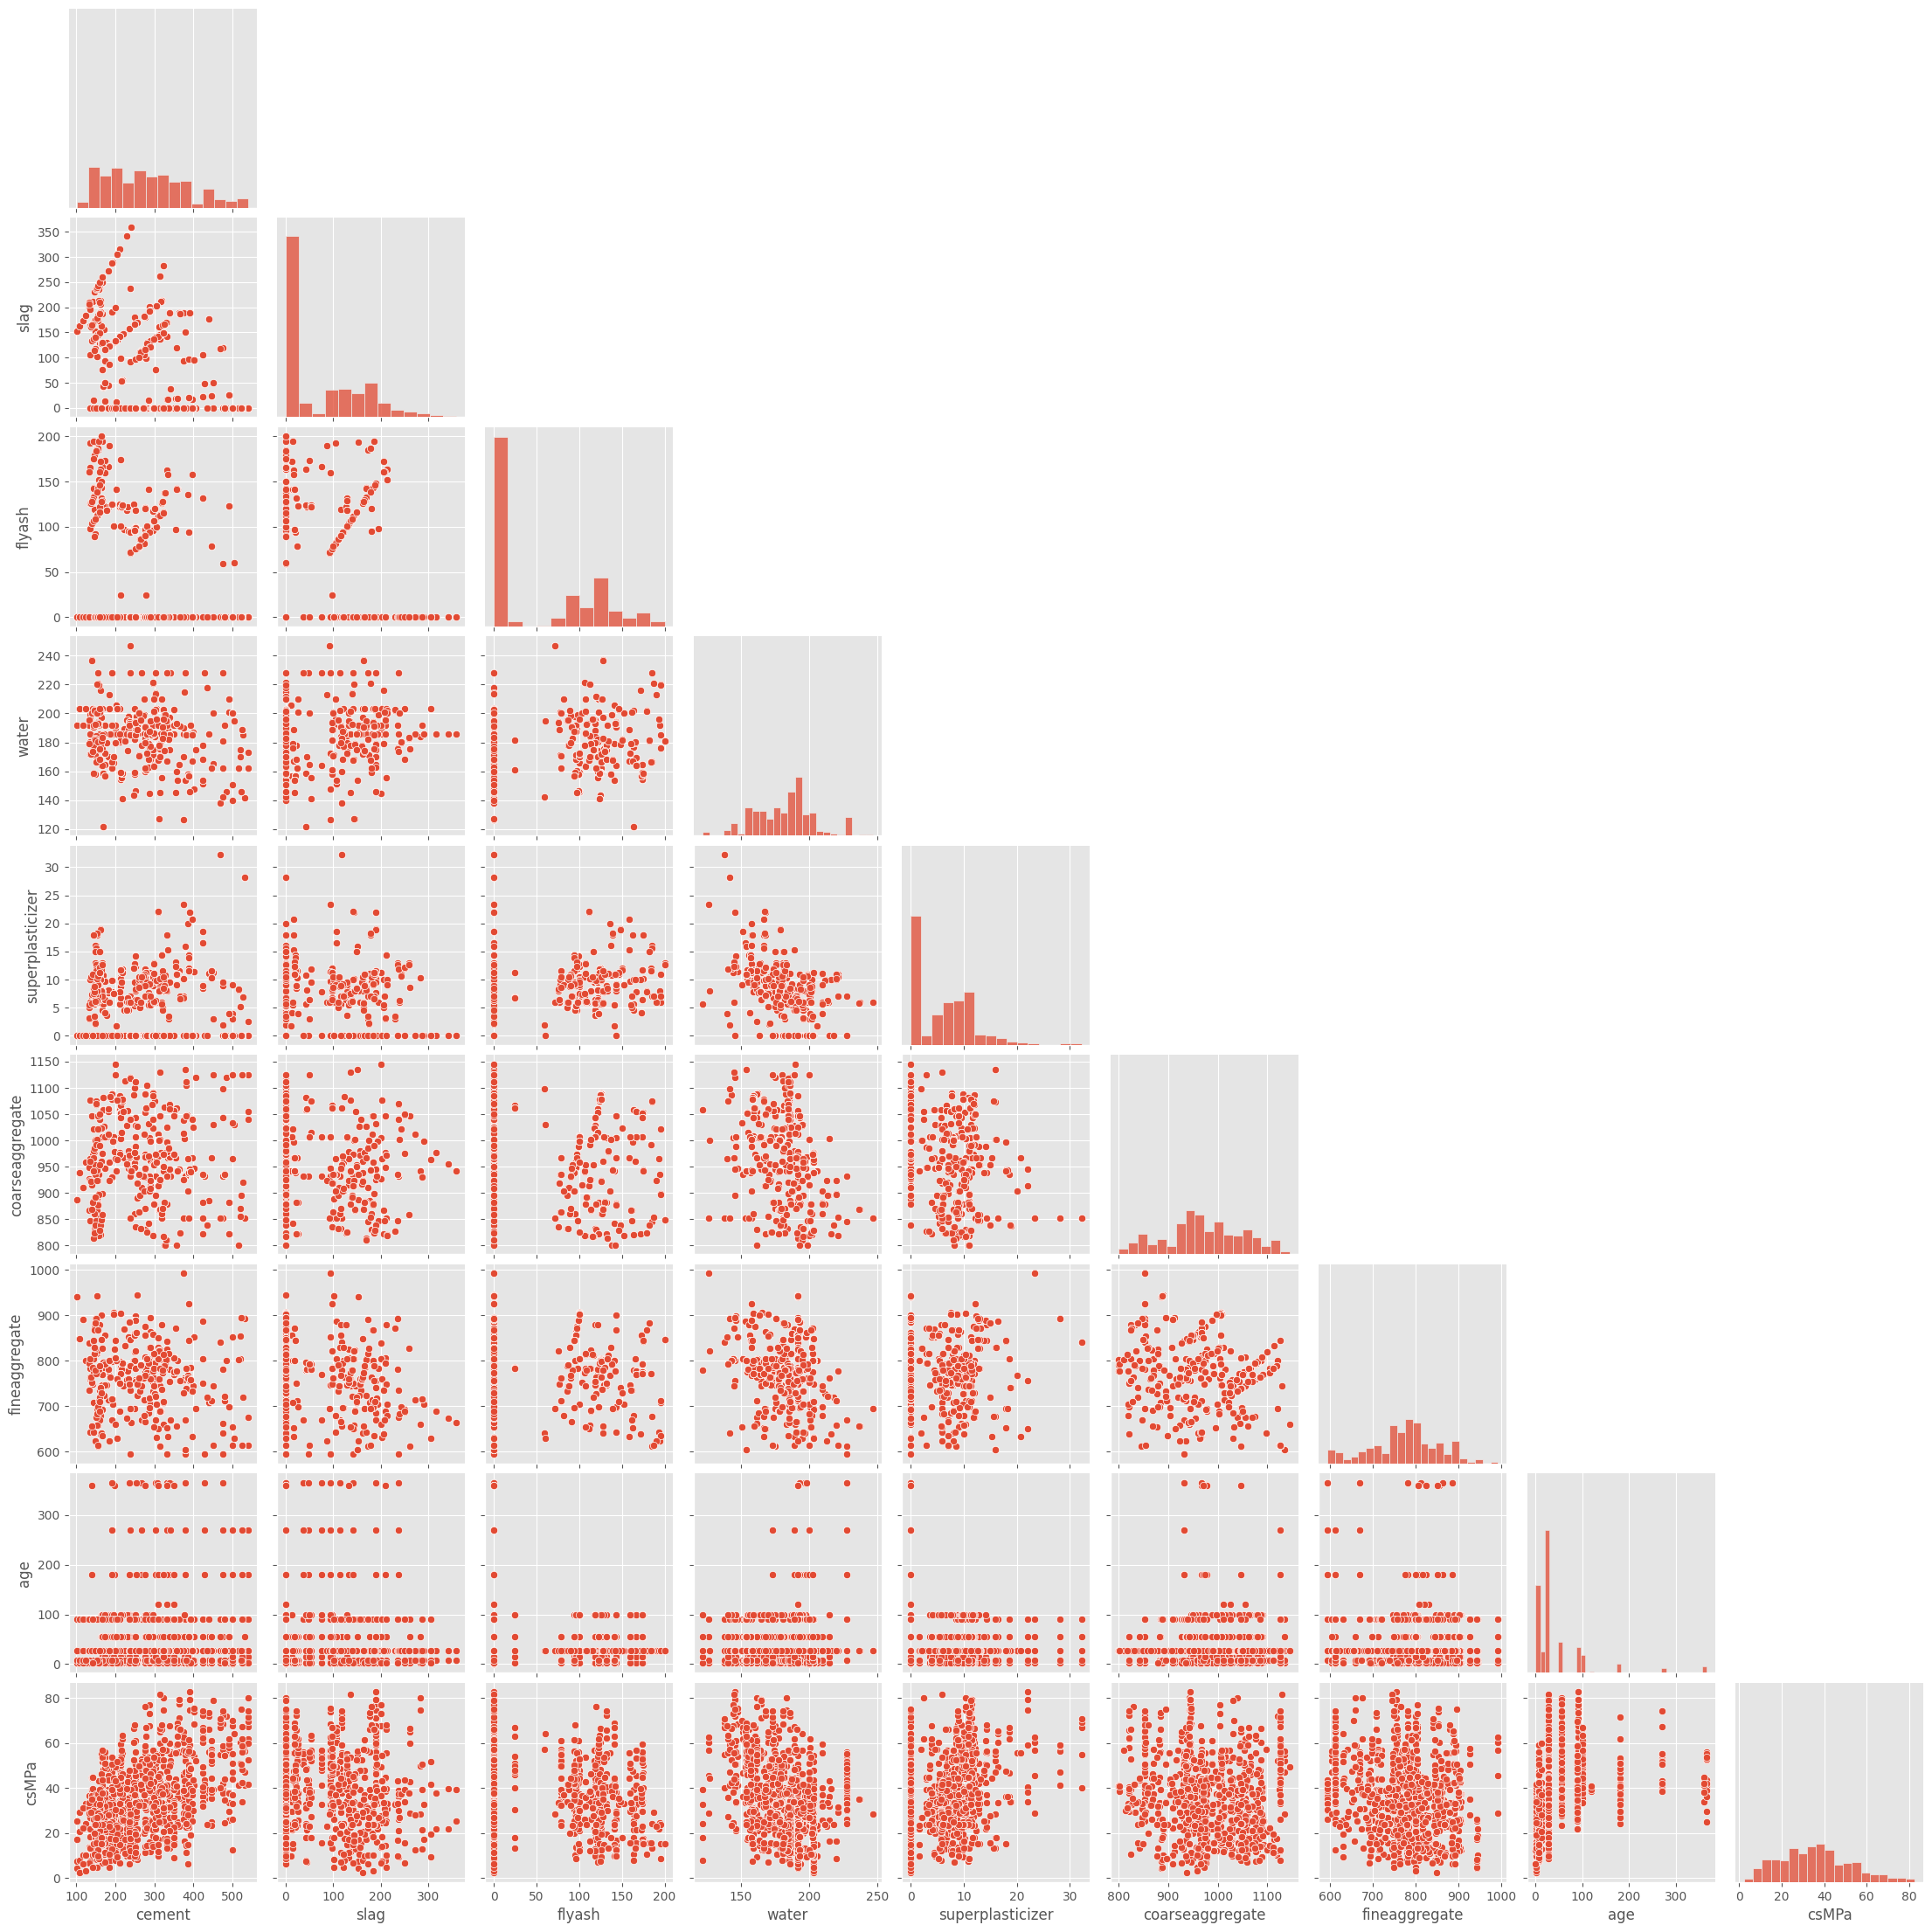

In [14]:
sns.pairplot(data=data, corner=True)

### Investigation of Zero-Values

There are many samples where slag, flyash, and/or superplasticizer have a value of zero.  I will check if this is intentional or if this is a case of missing inputs (either missing at random, missing completely at random, or missing not at random).

From personal experience, I am aware that the only required consituent materials for concrete are a binder (usually cement), rough and fine aggregates (usually stone and sand), and water.  For this reason, the additives with missing values (zeros) should not be a concern.  However, the effect of each additive's missingness as well as their correlation to the amount of other materials is a valuable exercise. 

In [20]:
# Count the number of zeros in each column
cols_with_missing = ['slag', 'flyash', 'superplasticizer']
missing_data.getZerosCounts(data, columns = cols_with_missing)

slag                471
flyash              566
superplasticizer    379
dtype: int64

In [16]:
missing_df = data.copy()
missing_df['slag_is_zero'] = (missing_df['slag'] == 0).astype(int)
missing_df['flyash_is_zero'] = (missing_df['flyash'] == 0).astype(int)
missing_df['superplasticizer_is_zero'] = (missing_df['superplasticizer'] == 0).astype(int)
missing_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,slag_is_zero,flyash_is_zero,superplasticizer_is_zero
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1,1,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1,1,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0,1,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0,1,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0,1,1


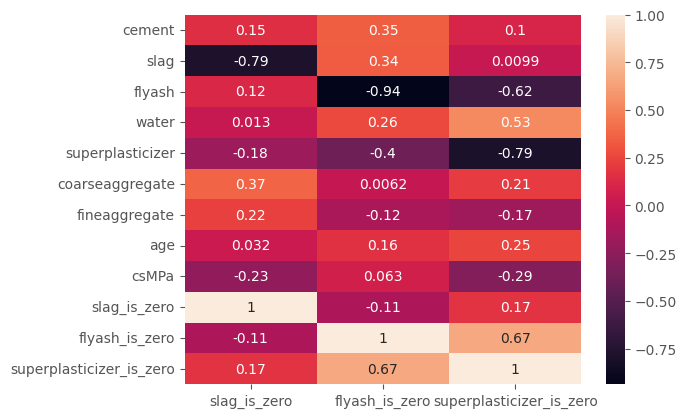

In [17]:
sns.heatmap(missing_df.corr()[['slag_is_zero', 'flyash_is_zero', 'superplasticizer_is_zero']], annot=True)
plt.show()
